### **CREDIT-WORTHINESS OF SMALL BUSINESSES**
#### Case study of small businesses guaranteed by the U.S. Small Business Administration(SBA)

### **Business Overview**

The Small Business Administration (SBA) is a crucial organization in the United States that supports and promotes small enterprises by providing access to credit. Through loan guarantees, the SBA encourages lenders to provide credit to small businesses, which play a vital role in job creation and reducing unemployment. However, there have been instances of loan defaults, posing a challenge for the SBA in accurately assessing the creditworthiness of applicants and mitigating risks. To address this, the SBA focuses on evaluating creditworthiness by considering factors such as financial history, business plans, collateral, and projected cash flows. They also strive to adapt to market dynamics, embracing innovative approaches and technology for informed lending decisions that minimize the likelihood of defaults. Overall, the SBA's commitment to supporting small businesses goes beyond loan guarantees, encompassing mentorship programs, training resources, government contracting opportunities, and disaster recovery assistance to foster an environment conducive to small business success.

### **Project Overview**

This project focuses on utilizing the dataset from the U.S. Small Business Administration to develop a predictive model for loan application approval. By analyzing relevant factors and historical loan data, the project aims to create a reliable system that assists the SBA in making informed decisions while minimizing the risk of defaults. The ultimate goal is to provide the SBA with a robust loan approval model that enhances their ability to make accurate and efficient lending decisions.

### **Objectives**

1. Conduct a comprehensive analysis of the dataset from the U.S. Small Business Administration to identify patterns and trends for accurate loan approval predictions.
2. Develop a robust machine learning model that utilizes the identified patterns and trends to predict loan approval outcomes effectively.
3. Deploy and evaluate the developed machine learning model in the loan approval process of the U.S. Small Business Administration, continuously optimizing its predictive capabilities for informed lending decisions.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
import warnings 

In [5]:
df = pd.read_csv('SBAnational.csv')
df.head()

c:\Users\ndung\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        shape_df = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return shape_df
    
    # method to check info on dataset
    def data_info(self):
        info_df = print(self.df.info(), '\n')
        return info_df
    
    # method to describe numerical columns
    def data_describe(self):
        num_col = self.df.describe()
        return num_col

In [7]:
# creating an instance of the class describer
describe_df = Describer(df)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 899164 rows
	* 27 columns 



In [8]:
# print summary information of the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899

In [9]:
#summary statistics of the data
describe_df.data_describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [10]:
# function to identify missing values

# identify missing 
def identify_missing_values(data):
    # identify if data has missing values
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing values, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

identify_missing_values(df)

The Data has missing values.


In [11]:
df.duplicated().any()

False

In [12]:
# function to display missing values

def missing_values(data):
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    return missing


missing_values(df)


,Missing Values,Percentage(%)
ChgOffDate,736465,0.819055
RevLineCr,4528,0.005036
LowDoc,2582,0.002872
DisbursementDate,2368,0.002634
MIS_Status,1997,0.002221
BankState,1566,0.001742
Bank,1559,0.001734
NewExist,136,0.000151
City,30,0.000033
Name,14,0.000016


We drop the column ```ChgOffDate```, representing the **date when a loan is declared to be in default**, due to the high percentage of missing values.

In [13]:
#dropping the ChgOffDate column
df.drop('ChgOffDate', axis = 1, inplace=True)

In [14]:
# checking the unique values in the target variable
df['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [15]:
#checking the percentage of data retained if we choose to drop all rows with missing values 
len(df.dropna())/len(df)

0.9856266487537313

Since we still have a very significant amount of data(```98.5%```) retained after dropping the missing values, we proceed and drop them.

In [16]:
#dropping the rows with missing values
df.dropna(inplace=True)

In [17]:
#confirming that we have dropped all rows with missing values
df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Next, we remove the dollar signs to facilitate data manipulation and for consistency.

In [18]:
#removing the dollar signs in the currency columns
dollar_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[dollar_columns] = df[dollar_columns].replace('[\$,]', '', regex=True).astype(float)

In [19]:
#confirming that all dollar signs have been dropped
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0


# **EDA**

## **Univariate Analysis**

We plot a graph to show the univariate distribution of the MIS_Status.

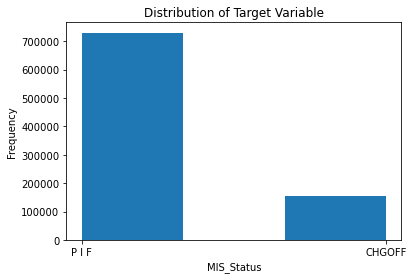

P I F     0.823929
CHGOFF    0.176071
Name: MIS_Status, dtype: float64


In [20]:
#plotting a histogram to visualize the distribution of the MIS_Status
plt.hist(df['MIS_Status'], bins=3)
plt.xlabel('MIS_Status')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()
print(df['MIS_Status'].value_counts(normalize=True))

More loans taken up were cleared fully(```82.3%```), while a smaller percentage(```17.6%```) of the loans taken up were defaulted.

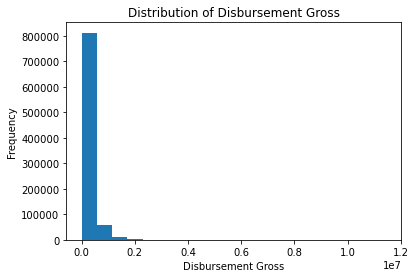

In [21]:
# Plotting a Histogram of DisbursementGross
plt.hist(df['DisbursementGross'], bins=20)
plt.xlabel('Disbursement Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Disbursement Gross')
plt.show()

The amounts disbursed according to the column ``DisbursementGross`` was majorly below 2 million USD. 

Next, we plot a scatter plot for the ``LoanNr_ChkDgt`` and the ``Term`` columns.

c:\Users\ndung\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


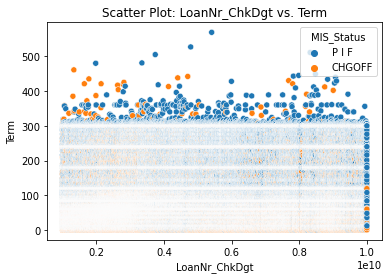

In [22]:
#visualizing the loan term of the borrower using the primary key identifier
sns.scatterplot(data=df, x='LoanNr_ChkDgt', y='Term', hue='MIS_Status')
plt.title('Scatter Plot: LoanNr_ChkDgt vs. Term')
plt.show()


<b> Observation: </b> The amount of loans that are Paid in Full & Charged Off, are irrespective of the Term Limit of the loan. 

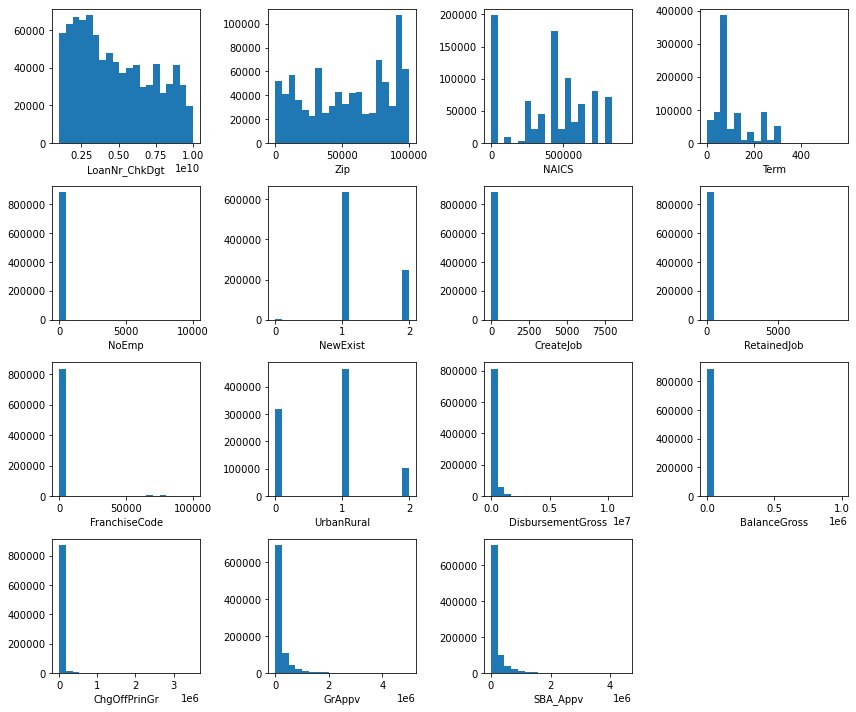

In [23]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.select_dtypes("number"), 1):
 plt.subplot(4, 4, i)
 plt.hist(df[feature], bins=20)
 plt.xlabel(feature)
plt.tight_layout()
plt.show()

These histogram plots illustrate the distribution of data for the numerical columns in the dataframe. 

Next, we will look for any outliers in the dataframe.

In [24]:
# Calculate the IQR
Q1 = df['DisbursementGross'].quantile(0.25)
Q3 = df['DisbursementGross'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the outliers
outliers = df[(df['DisbursementGross'] < lower_bound) | (df['DisbursementGross'] > upper_bound)]
# Print the outliers
print(outliers)

        LoanNr_ChkDgt                           Name  \
6          1000093009  MIDDLE ATLANTIC SPORTS CO INC   
20         1000324002            ECONOLODGE OF DUMAS   
23         1000434000  TRIANGLE MACHINE & MFG., INC.   
31         1000524003    AUDELIA FAMILY DENTAL GROUP   
58         1000726007        NEW DIMENSION HOMES INC   
...               ...                            ...   
899099     9994473007  SACRAMENTO VINTAGE FORD PARTS   
899100     9994483010   PAWTUXET VALLEY PRESCRIPTION   
899132     9995043009            EL PASO BBQ COMPANY   
899141     9995173002  LITTLE PEOPLE'S LEARNING CTR.   
899142     9995203009         IMAK ENTERPRISES, INC.   

                                  City State    Zip  \
6                                UNION    NJ   7083   
20                               DUMAS    TX  79029   
23                              EULESS    TX  76040   
31                              DALLAS    TX  75243   
58      CLINTON (CENSUS NAME FOR CLINT    ME   4927 

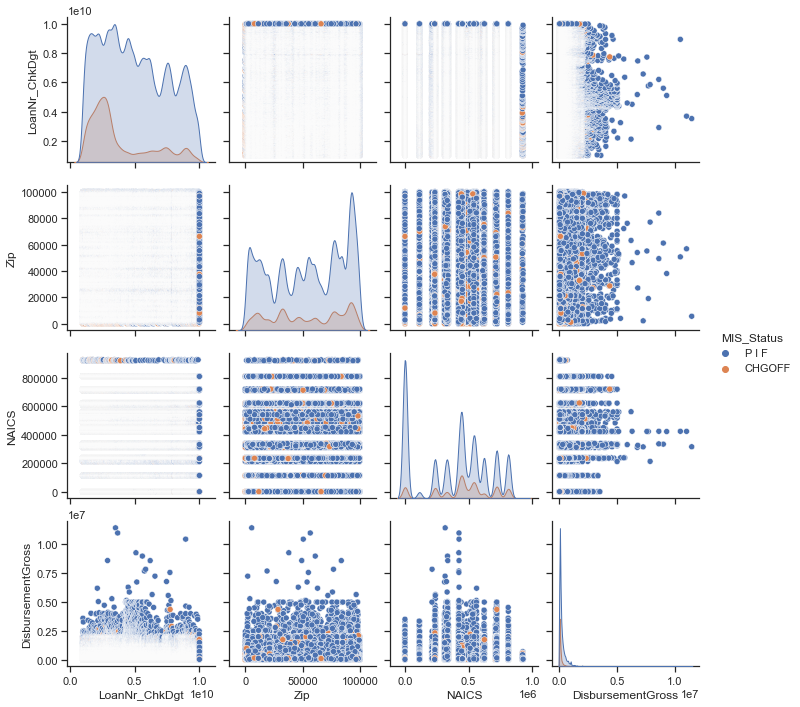

In [25]:
# Select the relevant columns for analysis
selected_columns = ['LoanNr_ChkDgt', 'City', 'State', 'Zip', 'Bank', 'NAICS',
                    'RevLineCr', 'LowDoc', 'DisbursementGross', 'MIS_Status']
# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Perform bivariate analysis
sns.set(style="ticks")
sns.pairplot(subset_df, hue='MIS_Status')
plt.show()

### Multivariate Analysis 

1. Correlation Matrix

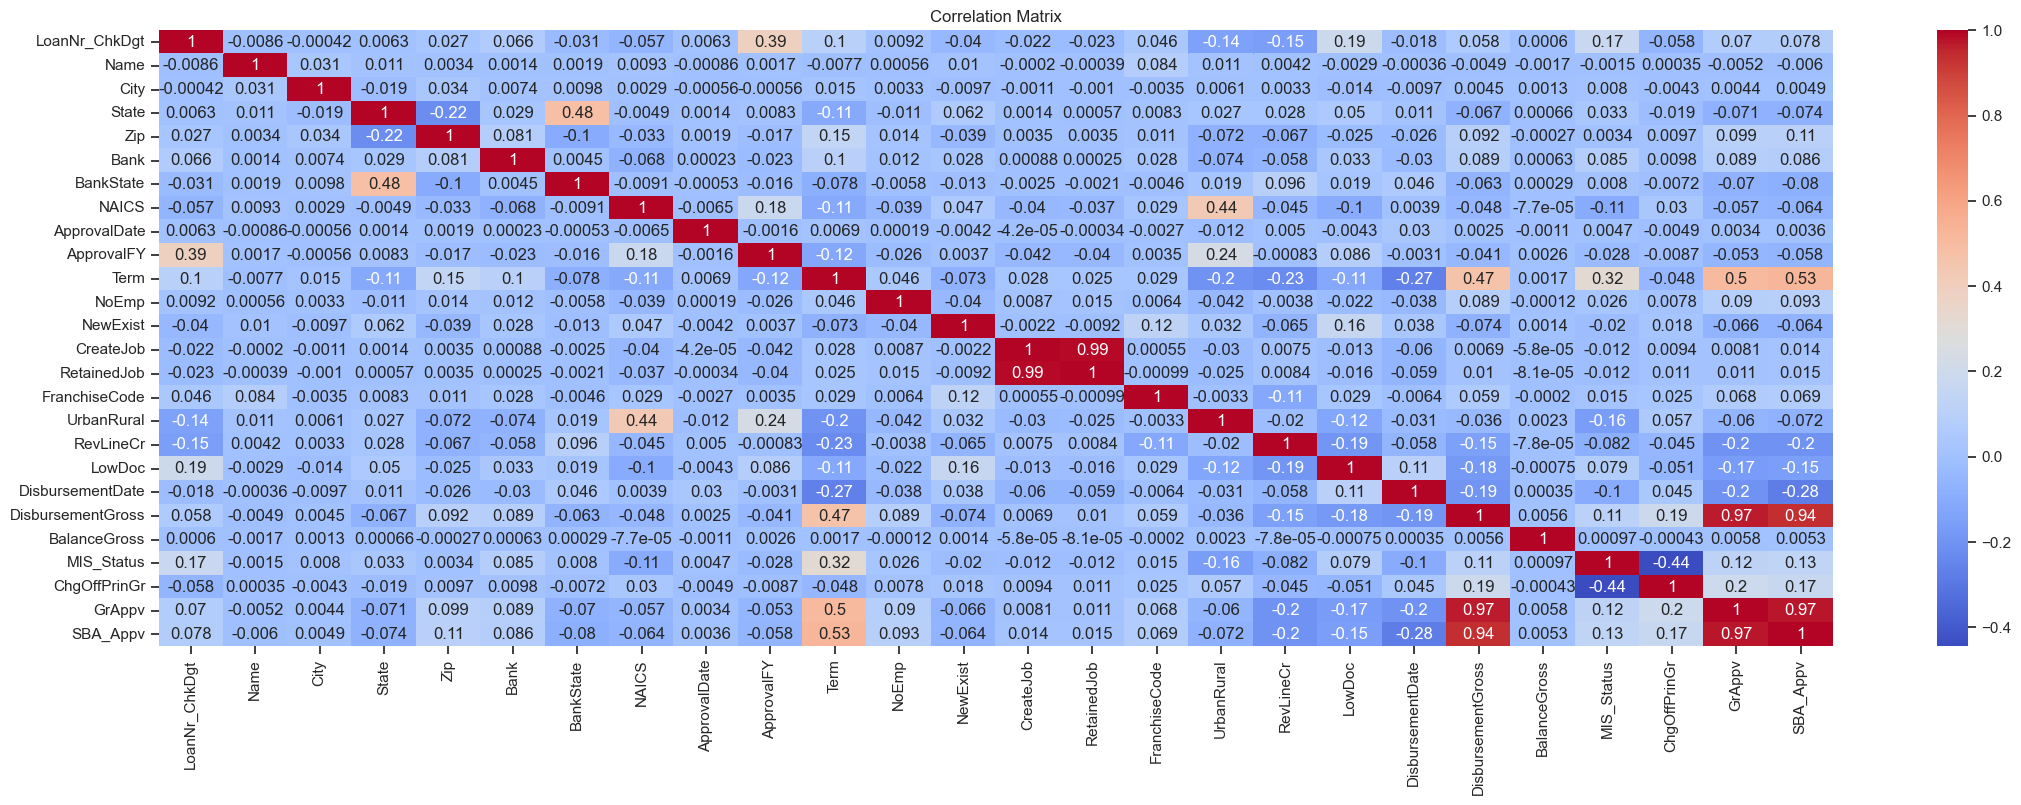

In [30]:
# Create a new DataFrame for encoded variables
encoded_df = pd.DataFrame()

# Perform label encoding on each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        encoded_df[column] = df[column].astype('category').cat.codes
    else:
        encoded_df[column] = df[column]

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation matrix using a heatmap

plt.figure(figsize=(27, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


***SBA data, many of the categorical variables, such as state, city, and bank, have no inherent order and there are many categories. Using label encoding 
on these variables could potentially introduce unintended patterns or biases in the data, as there is no relationship or hierarchy between the categories.***

***We performed label encoding to transform the categorical variables into numerical to enable visualization on a heatmap.
Mention the variables that have a high correlation, which ones should be dropped and why. 
Observe the accuracy level of the SBA_Approv vs GrAPPV VIS A VIS our accuracy level/target accuracy.***

In [32]:
encoded_df['MIS_Status']

0         1
1         1
2         1
3         1
4         1
         ..
899159    1
899160    1
899161    1
899162    0
899163    1
Name: MIS_Status, Length: 886240, dtype: int8

## Preprocessing

In [1]:
from sklearn.metrics import f1_score

next, we commit


again, we commit
